In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-15.711949438678928 23.447945844934992
-40.26926500590041 -170.85095187224127
-48.5351780465045 -23.245335853964434
20.372225886481132 31.705421149803357
10.8246335738706 -175.97537056671533
-33.73442480412903 -19.262528339758262
82.86979605558415 -129.27596218434283
-29.853723944865102 -121.08680407124376
11.151903614124876 162.91663297676513
-73.93376347025327 -4.369389480872229
-83.3998922831393 -23.459740177526612
5.697006108317169 -161.09914403501975
51.88479612227377 68.4285174157441
-84.97583462559118 -64.18452293535096
-46.71470320451086 -167.99898493785383
-89.52857847859727 -161.98670582654694
77.22525327407897 36.12650084483877
-80.6063012881337 15.193675579399468
-84.28032110337449 -68.21311043215145
35.52899412299051 127.38117993787
-25.2757476702305 -167.59064031838818
-74.56533006697083 -36.36578887064803
-18.329129421996768 75.02060151827706
-43.49336837634055 60.31213792811488
-2.6289538580951444 -115.7193925260805
44.56560022603446 -158.20112017820114
-63.973850017008

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | senanga
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | marawi
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | atbasar
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | seoul
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | atuona
Processing Record 22 o

Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | gigmoto
Processing Record 39 of Set 4 | kruisfontein
Processing Record 40 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 41 of Set 4 | khekra
Processing Record 42 of Set 4 | koungheul
Processing Record 43 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 44 of Set 4 | kaeo
Processing Record 45 of Set 4 | denau
City not found. Skipping...
Processing Record 46 of Set 4 | alcala la real
Processing Record 47 of Set 4 | kearney
Processing Record 48 of Set 4 | semey
Processing Record 49 of Set 4 | nizhnyaya tavda
Processing Record 50 of Set 4 | hofn
Processing Record 1 of Set 5 | lokken verk
City not found. Skipping...
Processing Record 2 of Set 5 | tigil
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | tiruvottiyur
City not found. Skipping...
Processing Record 5 of Set 5 | henties bay
Processing Record 6 of Set 5 | wenling
Processin

Processing Record 20 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 21 of Set 8 | maham
Processing Record 22 of Set 8 | nuuk
Processing Record 23 of Set 8 | havoysund
Processing Record 24 of Set 8 | dongsheng
Processing Record 25 of Set 8 | balabac
Processing Record 26 of Set 8 | faya
Processing Record 27 of Set 8 | toliary
City not found. Skipping...
Processing Record 28 of Set 8 | manaquiri
Processing Record 29 of Set 8 | upernavik
Processing Record 30 of Set 8 | longlac
City not found. Skipping...
Processing Record 31 of Set 8 | sambava
Processing Record 32 of Set 8 | greytown
Processing Record 33 of Set 8 | mehamn
Processing Record 34 of Set 8 | rudsar
Processing Record 35 of Set 8 | jais
Processing Record 36 of Set 8 | kjollefjord
Processing Record 37 of Set 8 | komsomolskiy
Processing Record 38 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 8 | goure
Processing Record 40 of Set 8 | kalabo
Processing Record 41 of Set 8 | sao gabri

Processing Record 8 of Set 12 | andros town
Processing Record 9 of Set 12 | dwarka
Processing Record 10 of Set 12 | garissa
Processing Record 11 of Set 12 | arosa
Processing Record 12 of Set 12 | bonnyville
Processing Record 13 of Set 12 | kabinda
Processing Record 14 of Set 12 | okha
Processing Record 15 of Set 12 | porecatu
Processing Record 16 of Set 12 | sosnovo-ozerskoye
Processing Record 17 of Set 12 | lapy
Processing Record 18 of Set 12 | coolum beach
Processing Record 19 of Set 12 | smithers
Processing Record 20 of Set 12 | lindi
Processing Record 21 of Set 12 | santa maria
Processing Record 22 of Set 12 | muros
Processing Record 23 of Set 12 | birao
Processing Record 24 of Set 12 | necochea
Processing Record 25 of Set 12 | canico
Processing Record 26 of Set 12 | cabra
Processing Record 27 of Set 12 | husavik
Processing Record 28 of Set 12 | amurzet
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | librazhd
Processing Record 31 of Set 12 | tessal

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Senanga,-16.1167,23.2667,87.12,43,98,7.63,ZM,2022-12-20 12:19:46
1,Vaini,-21.2000,-175.2000,77.16,100,20,3.44,TO,2022-12-20 12:19:47
2,Arraial Do Cabo,-22.9661,-42.0278,73.26,83,100,18.41,BR,2022-12-20 12:19:47
3,Marawi,7.9986,124.2928,69.58,97,100,1.59,PH,2022-12-20 12:19:47
4,Kapaa,22.0752,-159.3190,71.92,74,0,20.71,US,2022-12-20 12:19:47
5,Jamestown,42.0970,-79.2353,27.55,69,100,4.61,US,2022-12-20 12:15:22
6,Tuktoyaktuk,69.4541,-133.0374,-5.82,97,100,7.16,CA,2022-12-20 12:19:48
7,Rikitea,-23.1203,-134.9692,76.08,83,39,19.13,PF,2022-12-20 12:19:48
8,Butaritari,3.0707,172.7902,80.82,82,84,17.78,KI,2022-12-20 12:15:27
9,Hermanus,-34.4187,19.2345,70.81,59,40,15.48,ZA,2022-12-20 12:19:49


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Senanga,ZM,2022-12-20 12:19:46,-16.1167,23.2667,87.12,43,98,7.63
1,Vaini,TO,2022-12-20 12:19:47,-21.2000,-175.2000,77.16,100,20,3.44
2,Arraial Do Cabo,BR,2022-12-20 12:19:47,-22.9661,-42.0278,73.26,83,100,18.41
3,Marawi,PH,2022-12-20 12:19:47,7.9986,124.2928,69.58,97,100,1.59
4,Kapaa,US,2022-12-20 12:19:47,22.0752,-159.3190,71.92,74,0,20.71
5,Jamestown,US,2022-12-20 12:15:22,42.0970,-79.2353,27.55,69,100,4.61
6,Tuktoyaktuk,CA,2022-12-20 12:19:48,69.4541,-133.0374,-5.82,97,100,7.16
7,Rikitea,PF,2022-12-20 12:19:48,-23.1203,-134.9692,76.08,83,39,19.13
8,Butaritari,KI,2022-12-20 12:15:27,3.0707,172.7902,80.82,82,84,17.78
9,Hermanus,ZA,2022-12-20 12:19:49,-34.4187,19.2345,70.81,59,40,15.48


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

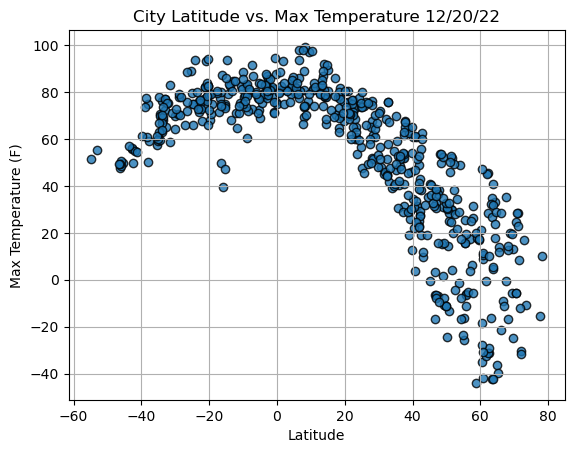

In [15]:
# import time module
import time 

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorperate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid("True")
           
#save the figure 
plt.savefig("weather_data/fig1.png")

#show plot
plt.show()

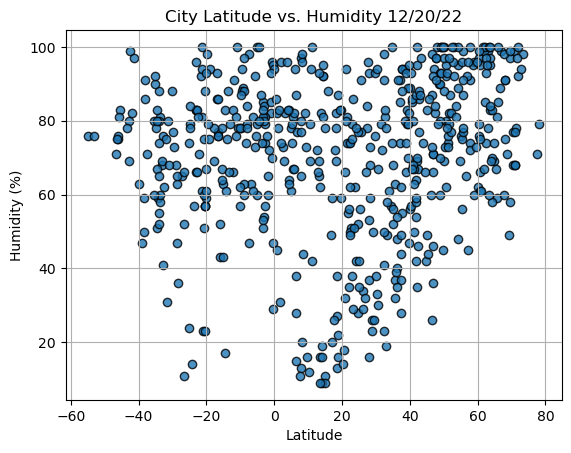

In [16]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorperate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid("True")
           
#save the figure 
plt.savefig("weather_data/fig2.png")

#show plot
plt.show()

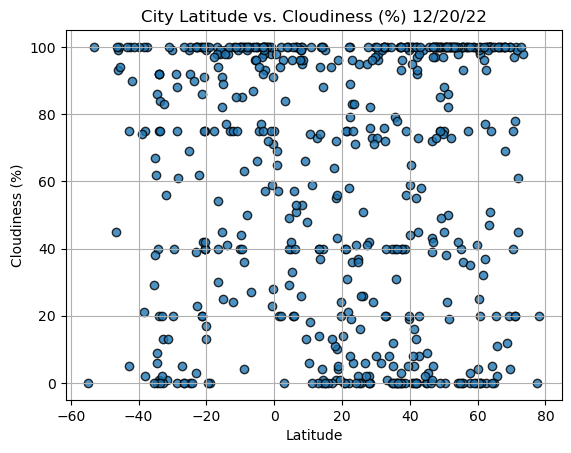

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorperate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid("True")
           
#save the figure 
plt.savefig("weather_data/fig3.png")

#show plot
plt.show()

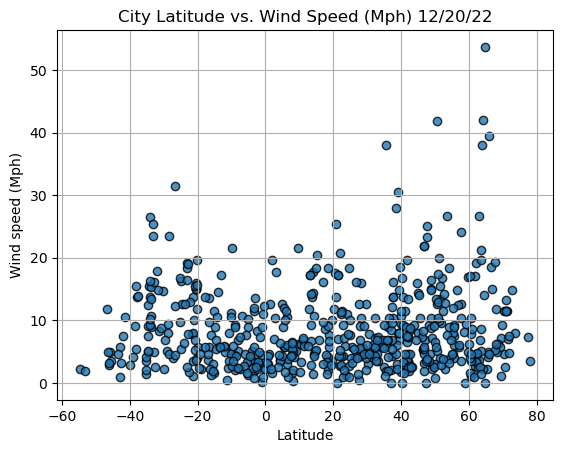

In [18]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incorperate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (Mph) " + time.strftime("%x"))
plt.ylabel("Wind speed (Mph)")
plt.xlabel("Latitude")
plt.grid("True")
           
#save the figure 
plt.savefig("weather_data/fig4.png")

#show plot
plt.show()